# CLASSIFICAÇÃO

#### IMPORTANDO PACOTES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn import metrics

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.datasets import load_diabetes

# REGRESSÃO

#### CARREGANDO OS DADOS

In [20]:
dados = load_diabetes(as_frame=True) # carrega o arquiv

diabetes_dados = dados.data #é o que tá carregando o dataframe

diabetes_dados['target'] = dados.target # juntando o target com o data(features)

diabetes_dados #.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


#### SIGNIFICADO DAS FEATURES:
* **Base Diabéticos**
* **age**, idade em anos;
* **sex**, masculino ou feminino;
* **bmi**, IMC;
* **bp**, pressão arterial;
* **s1** tc, T-Cells (tipo de glóbulo branco);
* **s2** ldl, colesterol ldl;
* **s3** hdl, colesterol hdl;
* **s4** tch, hormônio estimulante da tireóide;
* **s5** ltg, antiepiléptico e estabilizador de humor;
* **s6** glu, nível de açúcar no sangue;
* ***Target***, índice de progressão da doença.

#### CRIANDO UMA MATRIZ DE CORRELAÇÃO
(para descobrir quais features tem relações mais fortes com o target)

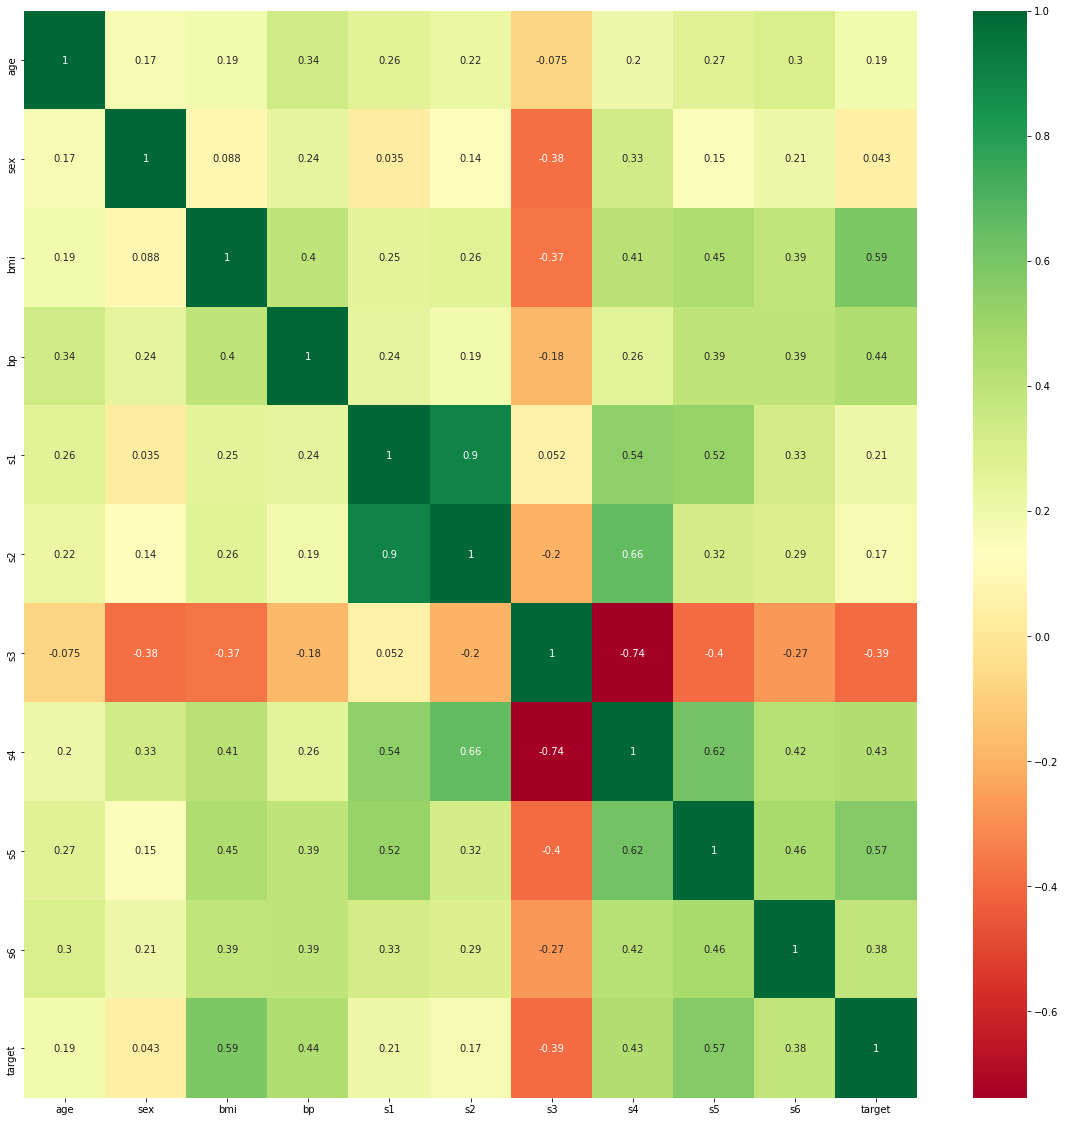

In [4]:
corrmat = diabetes_dados.corr() #aqui tô criando a correlação

top_corr_features = corrmat.index #(O QUE TÁ ROLANDO AQUI?)

plt.figure(figsize=(20,20)) #criando a figura e dizendo o tamanho

g=sns.heatmap(diabetes_dados[top_corr_features].corr(),annot=True,cmap='RdYlGn')

As features com correlação mais forte foram "s4", "bp", "s5" e "bmi".

#### VISUALIZANDO AS FEATURES MAIS FORTES COM PAIRPLOT

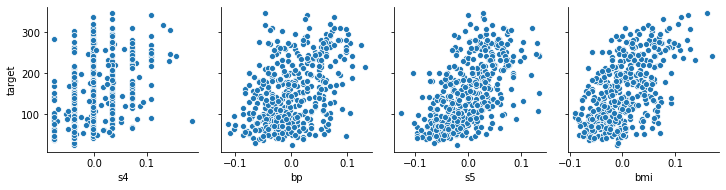

In [5]:
sns.pairplot(diabetes_dados, y_vars='target', x_vars=['s4','bp','s5','bmi'])


#### SEPARANDO FEATURES E TARGET

In [6]:
X = diabetes_dados.drop(columns=['target','s6','s3','s2','s1','sex','age'])
print(X)

          bmi        bp        s4        s5
0    0.061696  0.021872 -0.002592  0.019908
1   -0.051474 -0.026328 -0.039493 -0.068330
2    0.044451 -0.005671 -0.002592  0.002864
3   -0.011595 -0.036656  0.034309  0.022692
4   -0.036385  0.021872 -0.002592 -0.031991
..        ...       ...       ...       ...
437  0.019662  0.059744 -0.002592  0.031193
438 -0.015906 -0.067642  0.034309 -0.018118
439 -0.015906  0.017282 -0.011080 -0.046879
440  0.039062  0.001215  0.026560  0.044528
441 -0.073030 -0.081414 -0.039493 -0.004220

[442 rows x 4 columns]


In [7]:
y = diabetes_dados['target'].array
print(y)

<PandasArray>
[151.0,  75.0, 141.0, 206.0, 135.0,  97.0, 138.0,  63.0, 110.0, 310.0,
 ...
 173.0,  72.0,  49.0,  64.0,  48.0, 178.0, 104.0, 132.0, 220.0,  57.0]
Length: 442, dtype: float64


#### DANDO UM SHUFFLE NOS DADOS

In [8]:
Xs, ys = shuffle(X, y, random_state=1)

#### SEPARANDO FEATURES E TARGET DE TREINO E DE TESTE

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2)

#Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### TREINANDO E VALIDANDO

0. LINEAR REGRESSION

In [22]:
model0 = LinearRegression()
model0.fit(X_train, y_train)
score_basic0 = model0.score(X_test, y_test)

score_basic0

0.5472909010490608

Text(0, 0.5, 'predito')

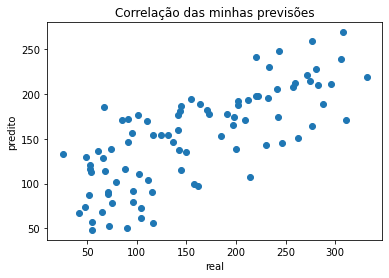

In [26]:
#visualizando predições para o Linear Regression
lrg_pred = model0.predict(X_test)

plt.scatter(y_test,lrg_pred,cmap='RdYlGn')
plt.title('Correlação das minhas previsões')
plt.xlabel('real')
plt.ylabel('predito')

1. LOGISTIC REGRESSION

In [21]:
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)
score_basic1 = model1.score(X_test, y_test)

score_basic1

0.011235955056179775

2. DECISION TREE

In [11]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
score_basic2 = model2.score(X_test, y_test)

score_basic2

0.01865851784479322

3. RANDOM FOREST

In [12]:
model3 = RandomForestRegressor(n_estimators=10)
model3.fit(X_train, y_train)
score_basic3 = model3.score(X_test, y_test)

score_basic3

0.4247964165507194

4. ADABOOST

In [13]:
model4 = AdaBoostRegressor()
model4.fit(X_train, y_train)
score_basic4 = model4.score(X_test, y_test)

score_basic4

0.49296935861773317

5. K-NEAREST NEIGHBORS - KNN

In [14]:
model5 = KNeighborsRegressor(n_neighbors=5)#(n_neighbors=30) 0.9333
model5.fit(X_train, y_train)
score_basic5 = model5.score(X_test, y_test)

score_basic5

0.4524725566523067

6. SUPPORT VECTOR MACHINE - SVM

In [15]:
model6 = SVR(kernel='linear')
model6.fit(X_train, y_train)
score_basic6 = model6.score(X_test, y_test)

score_basic6

0.523207085619447

Text(0, 0.5, 'predito')

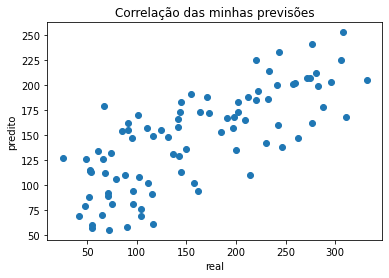

In [16]:
#visualizando predições para o SVM
svm_pred = model6.predict(X_test)

plt.scatter(y_test,svm_pred)
plt.title('Correlação das minhas previsões')
plt.xlabel('real')
plt.ylabel('predito')

#### VALIDANDO COM CROSS VALIDATION

In [23]:
modelos = { 
    '0. Linear Regression': LinearRegression(),
    '1. Logistic Regression': LogisticRegression(max_iter=200),
    '2. Decision Tree': DecisionTreeRegressor(),
    '3. Random Forest': RandomForestRegressor(n_estimators=2),
    '4. Ada Boost': AdaBoostRegressor(),
    '5. KNN': KNeighborsRegressor(n_neighbors=5),
    '6. SVC': SVR(kernel='linear')}

np.set_printoptions(precision=3)

for name, regression in modelos.items():
  scores = cross_val_score(regression, Xs, ys, cv=5)
  print("{} \nScores: {}\n".format(name, (np.mean(scores))))

0. Linear Regression 
Scores: 0.45317085197160745



/home/nico/anaconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


1. Logistic Regression 
Scores: 0.01131256384065373

2. Decision Tree 
Scores: -0.1562583752019727

3. Random Forest 
Scores: 0.15634273613070784

4. Ada Boost 
Scores: 0.4061913043665034

5. KNN 
Scores: 0.3251174997435546

6. SVC 
Scores: -0.013469780120777885

